In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
col_to_drop=["Engine Fuel Type","Number of Doors","Market Category","Vehicle Size","Vehicle Style","Popularity"]
df=df.drop(col_to_drop,axis=1)

In [8]:
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [9]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [14]:
rename_col={"Engine HP":"HP","Engine Cylinders":"cylinders","Transmission Type":"Transmission",
           "Driven_Wheels":"Driven_mode","highway MPG":"MPG-H","city mpg":"mpg-c","MSRP":"Price"}
df=df.rename(columns=rename_col)

In [15]:
df.head()

,Make,Model,Year,HP,cylinders,Transmission,Driven_mode,MPG-H,mpg-c,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [16]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
cylinders       11884
Transmission    11914
Driven_mode     11914
MPG-H           11914
mpg-c           11914
Price           11914
dtype: int64

In [22]:
df=df.drop_duplicates()

In [23]:
df.head()

,Make,Model,Year,HP,cylinders,Transmission,Driven_mode,MPG-H,mpg-c,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [24]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
cylinders       10895
Transmission    10925
Driven_mode     10925
MPG-H           10925
mpg-c           10925
Price           10925
dtype: int64

In [25]:
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
cylinders       30
Transmission     0
Driven_mode      0
MPG-H            0
mpg-c            0
Price            0
dtype: int64

In [26]:
df=df.dropna()

In [27]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
cylinders       0
Transmission    0
Driven_mode     0
MPG-H           0
mpg-c           0
Price           0
dtype: int64


In [28]:
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
cylinders       10827
Transmission    10827
Driven_mode     10827
MPG-H           10827
mpg-c           10827
Price           10827
dtype: int64

In [29]:
df.describe()

,Year,HP,cylinders,MPG-H,mpg-c,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


# Removing outliers

<Axes: xlabel='Price'>

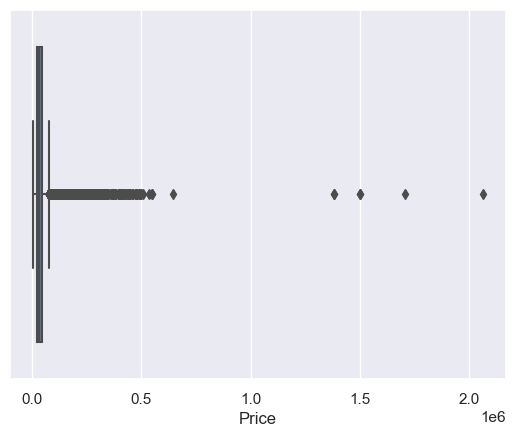

In [30]:
sns.boxplot(x=df["Price"])

<Axes: xlabel='HP'>

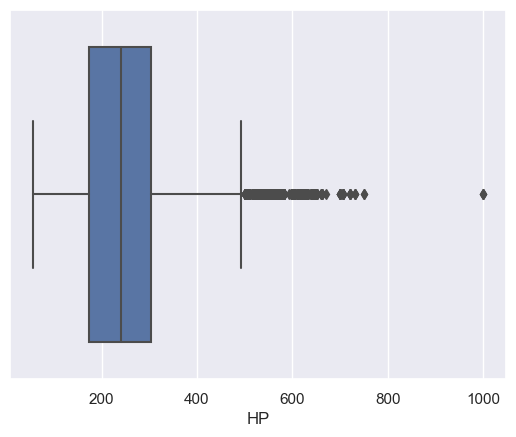

In [31]:
sns.boxplot(x=df["HP"])

In [32]:
df.loc[:,df.dtypes!=object]

,Year,HP,cylinders,MPG-H,mpg-c,Price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


# saving the column name of the  non object into the variable name

In [33]:
l=list(df.loc[:,df.dtypes!=object].columns)

In [34]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
lower_bond=Q1-(1.5*IQR)
upper_bond=Q3+(1.5*IQR)


In [40]:
df2=df[~((df<lower_bond) | (df>upper_bond)).any(axis=1)]

In [41]:
df2.head()

,Make,Model,Year,HP,cylinders,Transmission,Driven_mode,MPG-H,mpg-c,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [42]:
print(df2.shape)

(9191, 10)


# using Z score to remov the outliers

In [43]:
z=np.abs(stats.zscore(df[l]))
print(z)

           Year        HP  cylinders     MPG-H     mpg-c     Price
0      0.014743  0.732425   0.174386  0.041059  0.049314  0.058463
1      0.014743  0.413769   0.174386  0.225455  0.049314  0.029591
2      0.014743  0.413769   0.174386  0.225455  0.101214  0.098621
3      0.014743  0.223542   0.174386  0.225455  0.199843  0.209390
4      0.014743  0.223542   0.174386  0.225455  0.199843  0.128320
...         ...       ...        ...       ...       ...       ...
11909  0.157006  0.413769   0.174386  0.440829  0.500900  0.058222
11910  0.157006  0.413769   0.174386  0.440829  0.500900  0.227587
11911  0.157006  0.413769   0.174386  0.440829  0.500900  0.130463
11912  0.299270  0.413769   0.174386  0.440829  0.500900  0.135279
11913  0.696575  0.305482   0.174386  0.041059  0.350371  0.216695

[10827 rows x 6 columns]


In [44]:
threshold=3
df3=df[(z<threshold).all(axis=1)]
df3

,Make,Model,Year,HP,cylinders,Transmission,Driven_mode,MPG-H,mpg-c,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [46]:
df3.shape

(10338, 10)

# visual plots

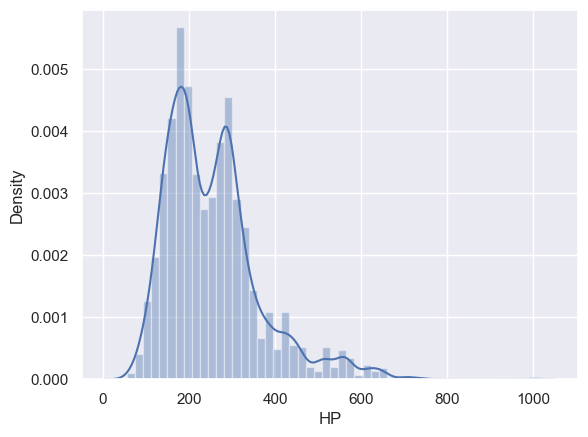

In [49]:
sns.distplot(df["HP"])
plt.show()

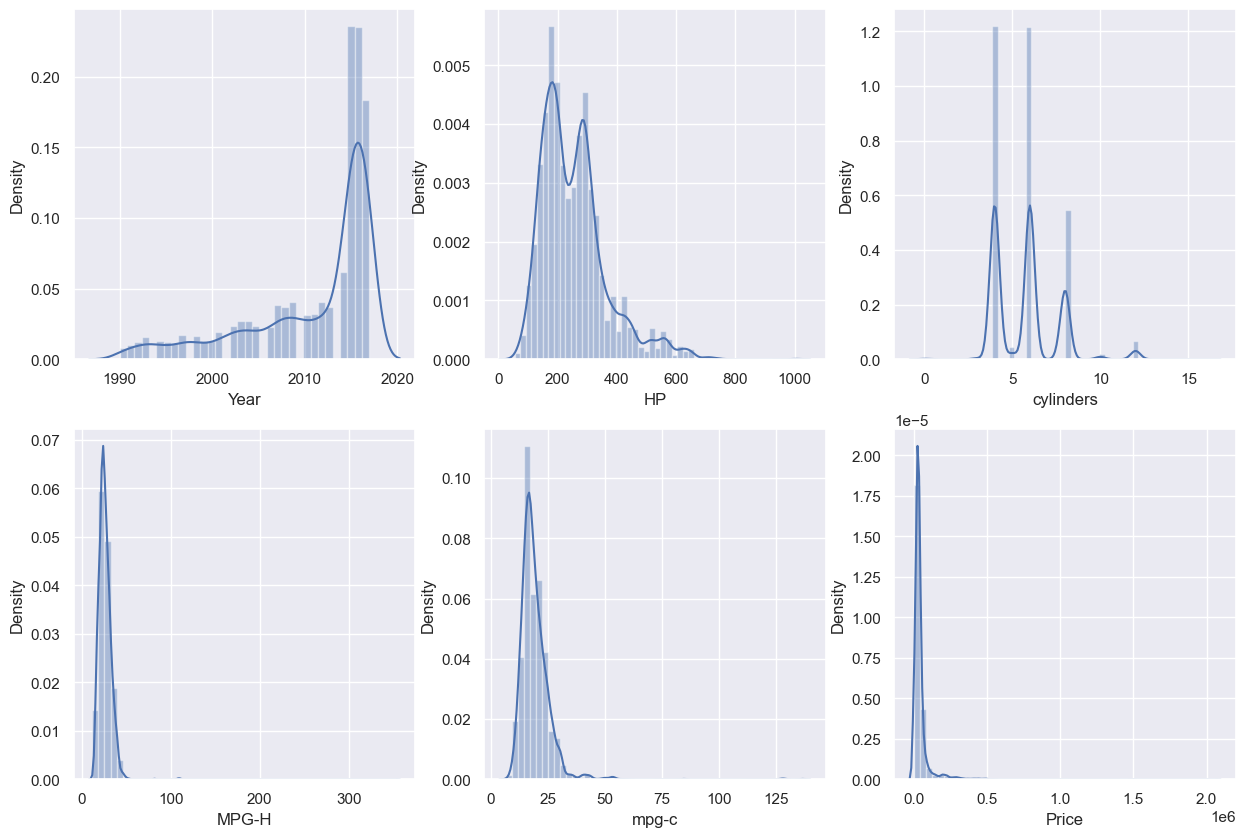

In [52]:
c=0
plt.figure(figsize=(15,10))
for i in l:
    c=c+1
    plt.subplot(2,3,c)
    sns.distplot(df[i])
plt.show()

# bar plots

<Axes: >

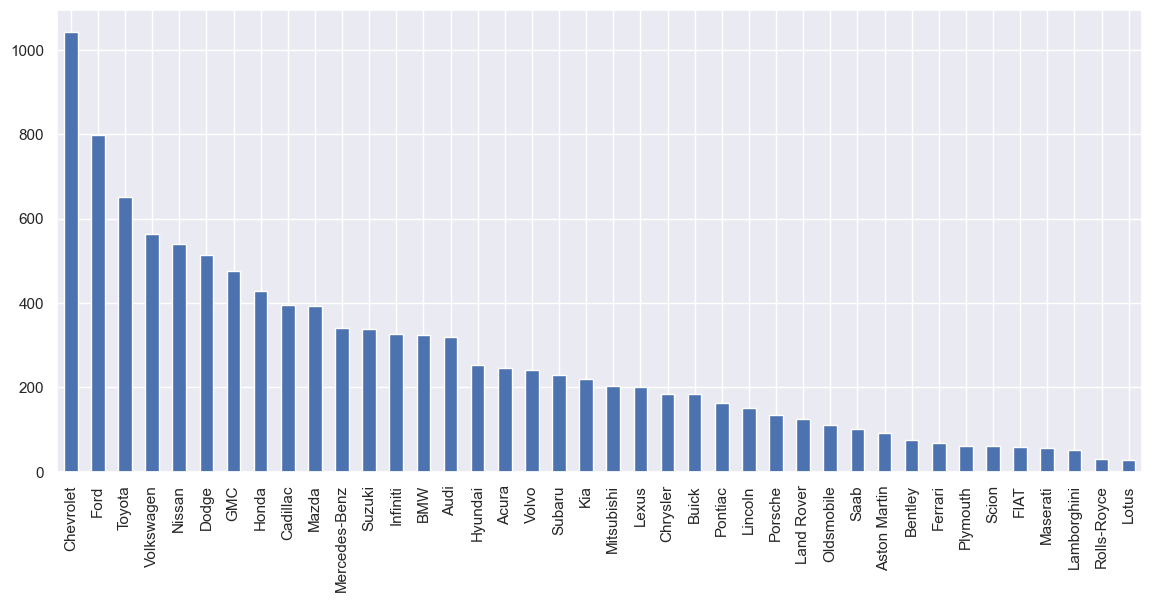

In [65]:
plt.figure(figsize=(12,8))
df.Make.value_counts().nlargest(40).plot(kind="bar",figsize=(14,6))


# count plot

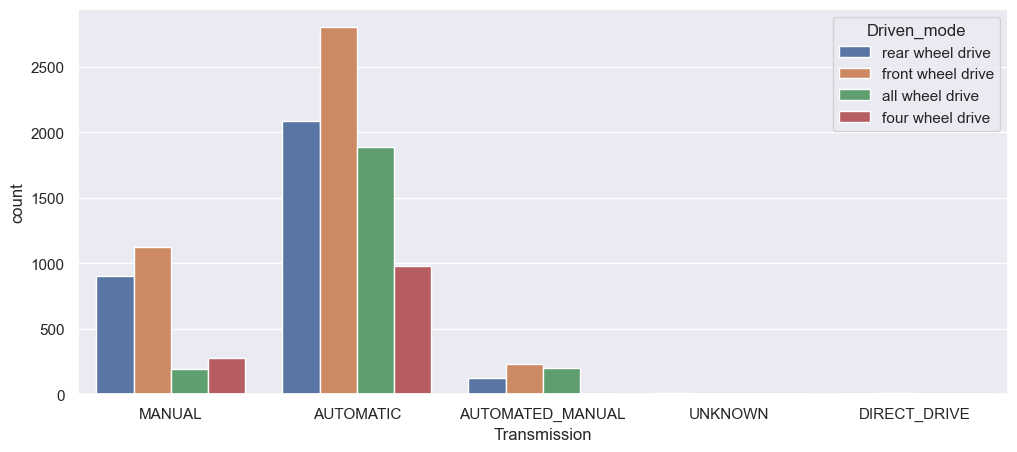

In [74]:
plt.figure(figsize=(12,5))
sns.countplot(x="Transmission",hue="Driven_mode",data=df)
plt.show()

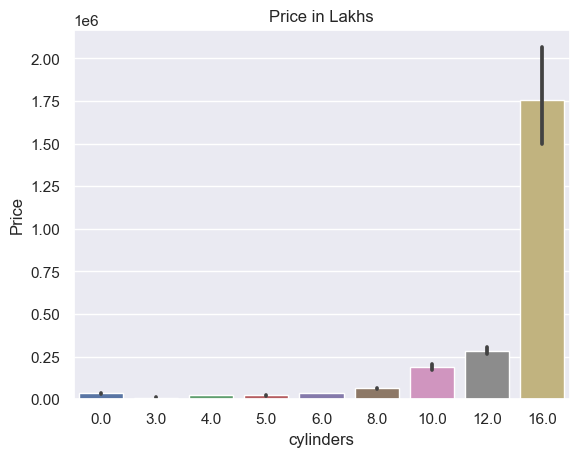

In [76]:
sns.barplot(x="cylinders",y="Price",data=df)
plt.title("Price in Lakhs")

plt.show()

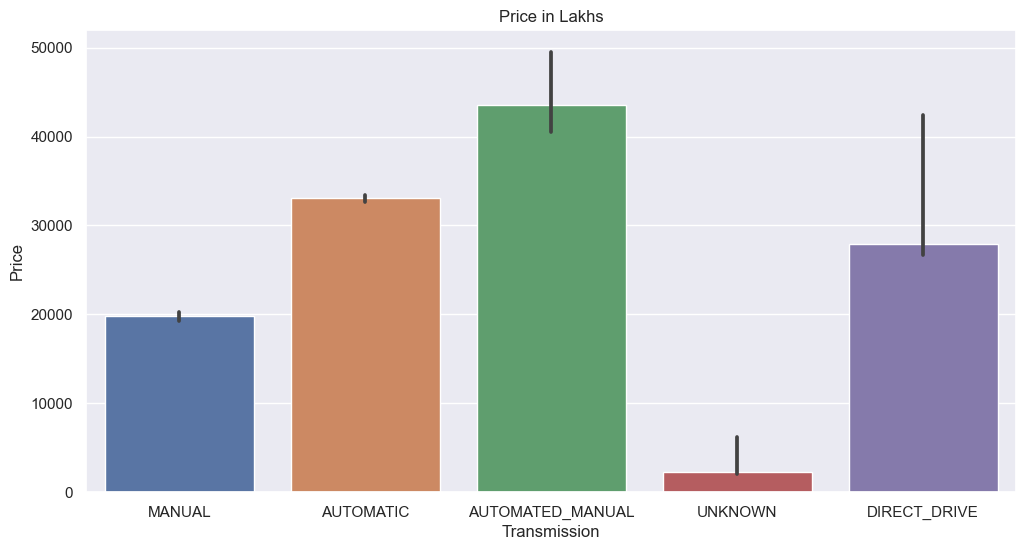

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(x="Transmission",y="Price",data=df,estimator=np.median)
plt.title("Price in Lakhs")

plt.show()

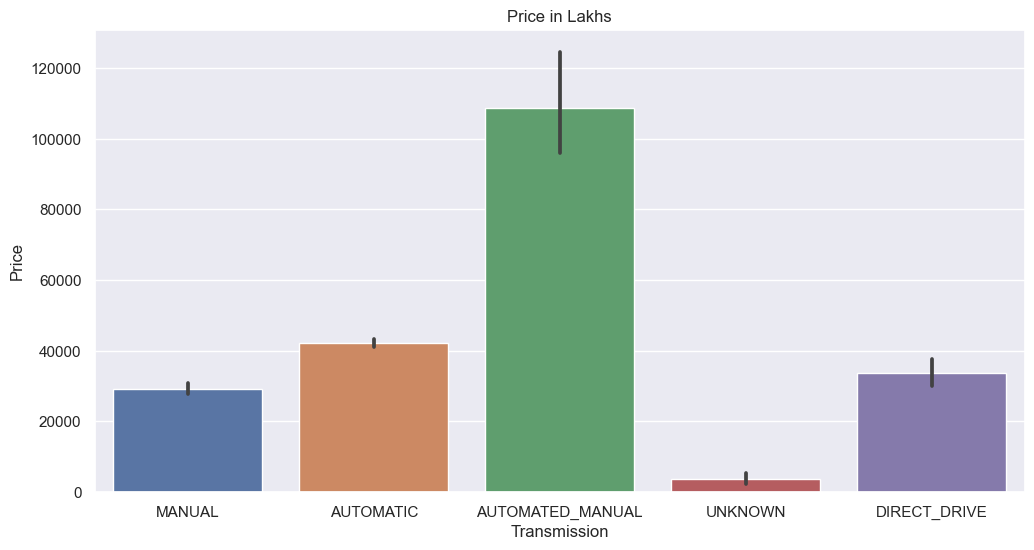

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x="Transmission",y="Price",data=df,estimator=np.mean)
plt.title("Price in Lakhs")

plt.show()

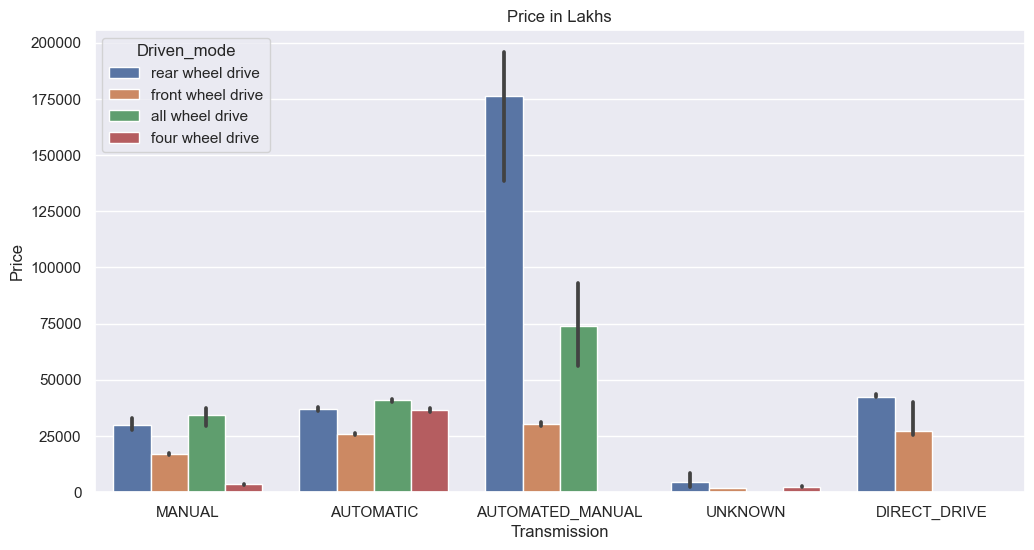

In [82]:
plt.figure(figsize=(12,6))
sns.barplot(x="Transmission",y="Price",hue="Driven_mode",data=df,estimator=np.median)
plt.title("Price in Lakhs")

plt.show()

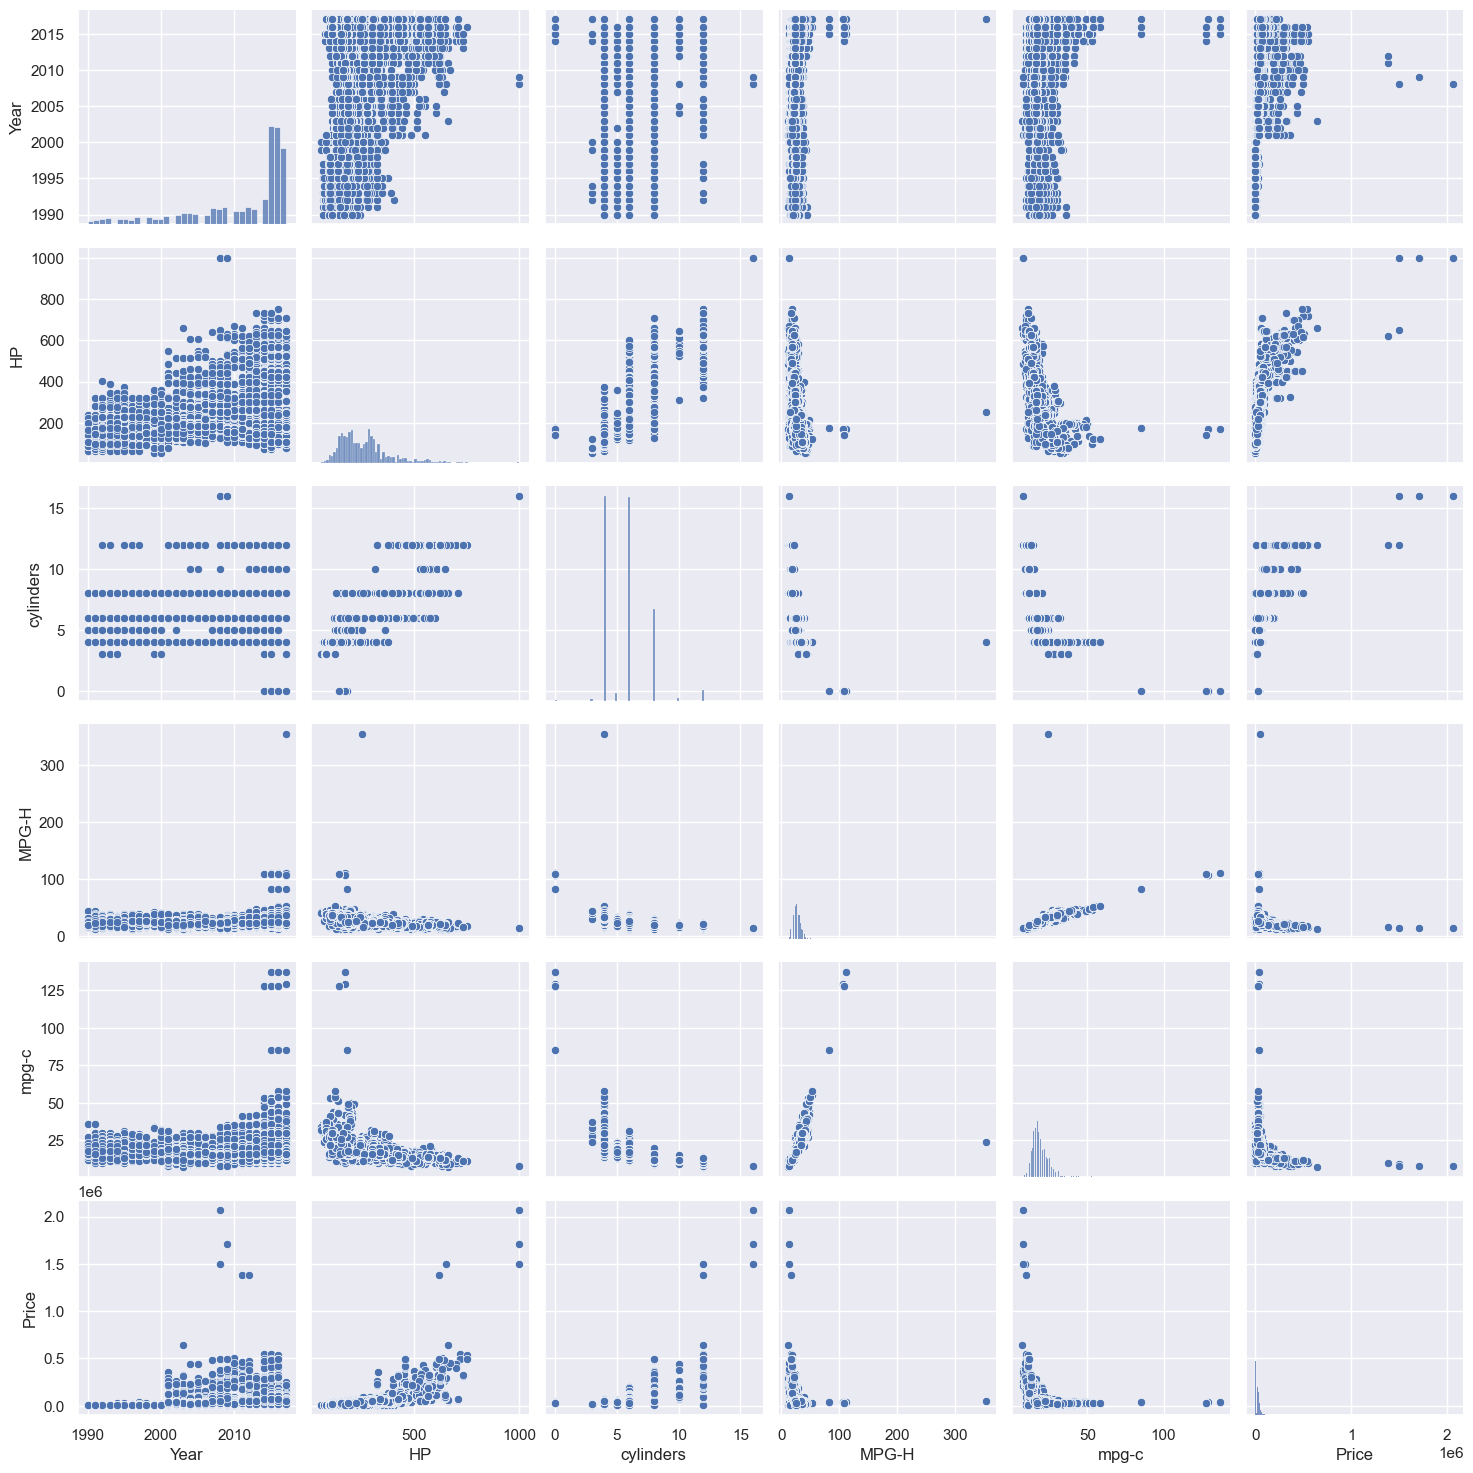

In [83]:
sns.pairplot(df)
plt.show()

# Heat map

In [84]:
corr=df.corr()
corr

,Year,HP,cylinders,MPG-H,mpg-c,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
mpg-c,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


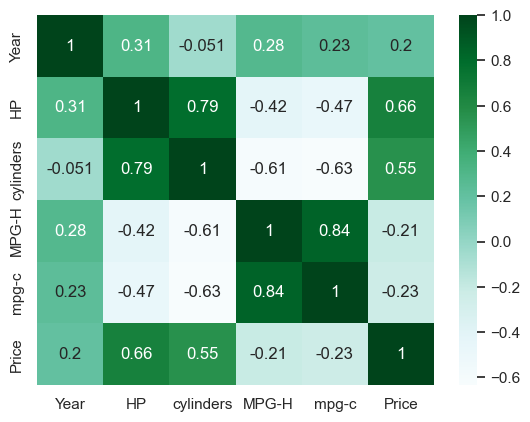

In [90]:
sns.heatmap(corr,cmap="BuGn",annot=True)
plt.show()